In [3]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = r'C:\Users\Sravanth vakati\OneDrive\Desktop\Oasis Infobyte\House Prices with Linear Regression\Housing.csv'
housing_data = pd.read_csv(file_path)
housing_data.head()
housing_data.info()
housing_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                        'airconditioning', 'prefarea', 'furnishingstatus']

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical_data = encoder.fit_transform(housing_data[categorical_features])
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, 
                                      columns=encoder.get_feature_names_out(categorical_features))

# Dropping original categorical columns and concatenating the encoded columns
housing_data = housing_data.drop(categorical_features, axis=1)
housing_data = pd.concat([housing_data, encoded_categorical_df], axis=1)

print(housing_data.head())

      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2           1.0   
1  12250000  8960         4          4        4        3           1.0   
2  12250000  9960         3          2        2        2           1.0   
3  12215000  7500         4          2        2        3           1.0   
4  11410000  7420         4          1        2        2           1.0   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0            0.0           0.0                  0.0                  1.0   
1            0.0           0.0                  0.0                  1.0   
2            0.0           1.0                  0.0                  0.0   
3            0.0           1.0                  0.0                  1.0   
4            1.0           1.0                  0.0                  1.0   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0           1.0  

In [6]:
X = housing_data.drop(columns='price')
y = housing_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(1754318687330.6643, 0.6529242642153184)

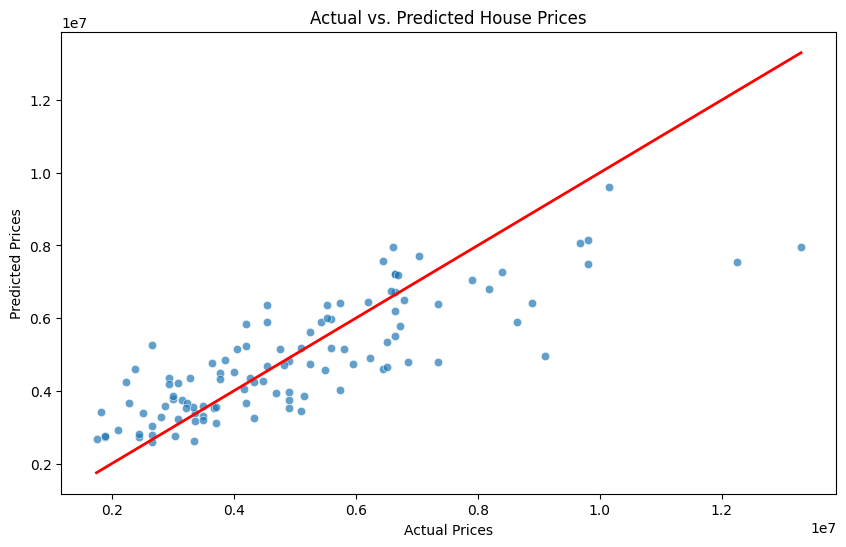

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.show()

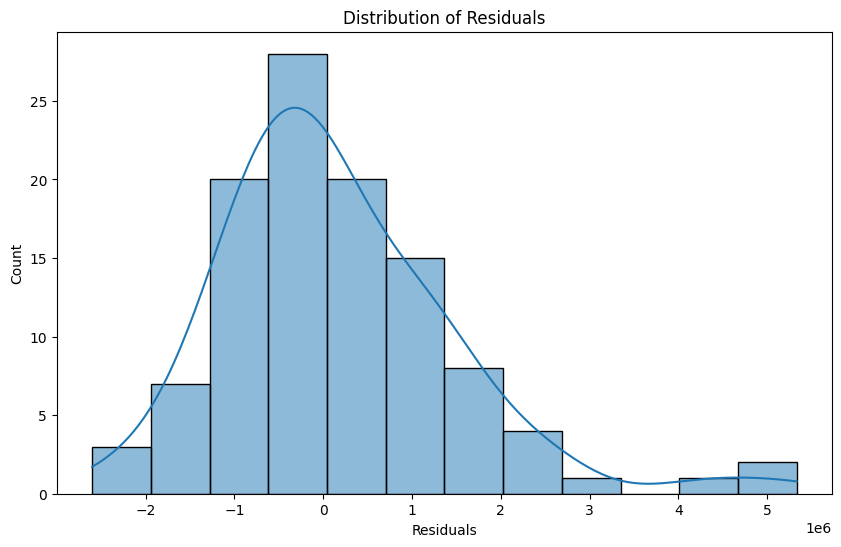

In [8]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()